In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from draw import color
import pandas as pd
import numpy as np
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [18]:
# 使用seaborn的数据
tips = sns.load_dataset('tips')

## 1. 散点图

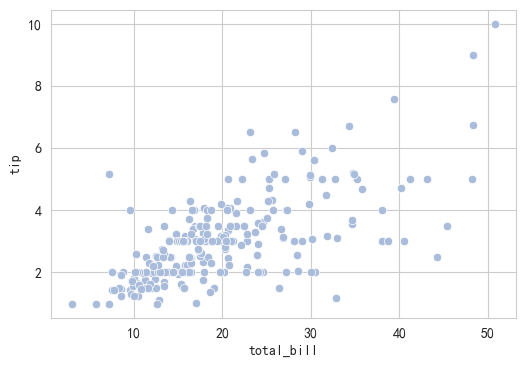

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x='total_bill',y='tip',data=tips, color=color.blue1[0], ax=ax)
plt.show()

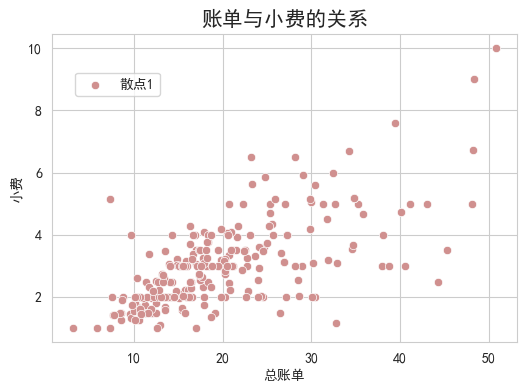

In [38]:
fig2, ax2 = plt.subplots(figsize=(6, 4))
sns.scatterplot(x='total_bill',y='tip',data=tips, color=color.red[0], ax=ax2, 
                label="散点1", marker="o")
ax2.set_xlabel("总账单")
ax2.set_ylabel("小费")
ax2.set_title("账单与小费的关系", fontsize=15)
ax2.legend(loc=(0.05, 0.8))
plt.show()

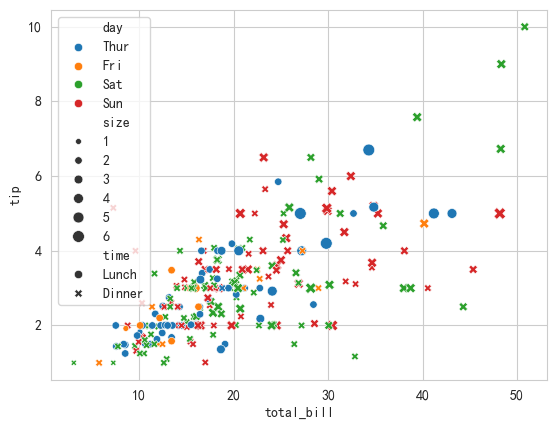

In [43]:
ax3 = sns.scatterplot(x='total_bill',y='tip',hue='day',style='time',size='size',data=tips)
plt.show()

## 更改legend

['day', 'Thur', 'Fri', 'Sat', 'Sun', 'size', '1', '2', '3', '4', '5', '6', 'time', 'Lunch', 'Dinner']


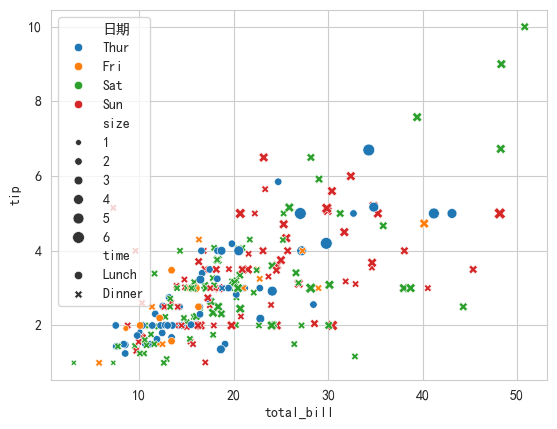

In [47]:
ax4 = sns.scatterplot(x='total_bill',y='tip',hue='day',style='time',size='size',data=tips)
handles, labels = ax4.get_legend_handles_labels()   # 获取当前图例的句柄和标签
print(labels)
new_labels = labels.copy()
new_labels[0] = "日期"
ax4.legend(handles, new_labels)
plt.show()

# 2. 线图

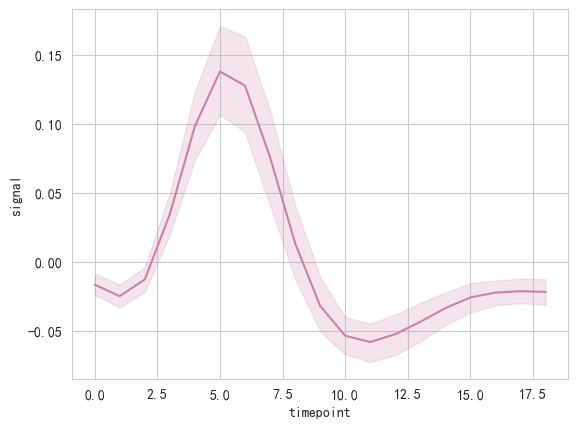

In [53]:
fmri = sns.load_dataset('fmri')
sns.lineplot(x="timepoint", y="signal", data=fmri, color=color.pink[2])
# 阴影是默认的置信区间，可设置ci=0，将其去除
plt.show()

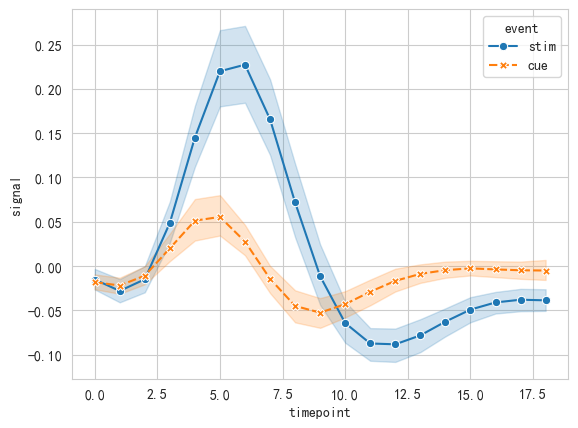

In [59]:
sns.lineplot(x="timepoint", y="signal",hue="event", style="event",
markers=True, dashes=True, data=fmri)
# markers=True 有散点
# dashes=True 区分样式, 一条实线，一条虚线
plt.show()

# 3. 关系图 (散点和线的结合)

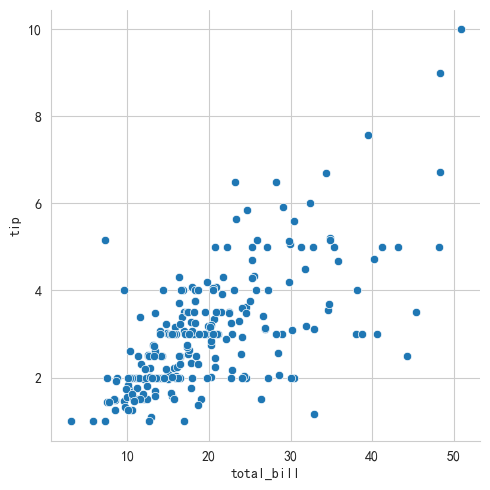

In [61]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")
plt.show()

### 通过`kind`设置图类型

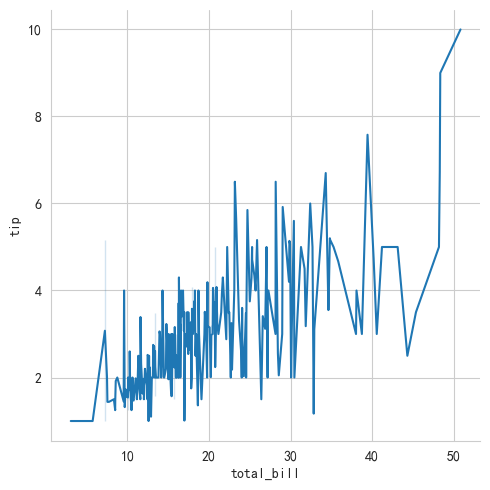

In [62]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="line")
plt.show()

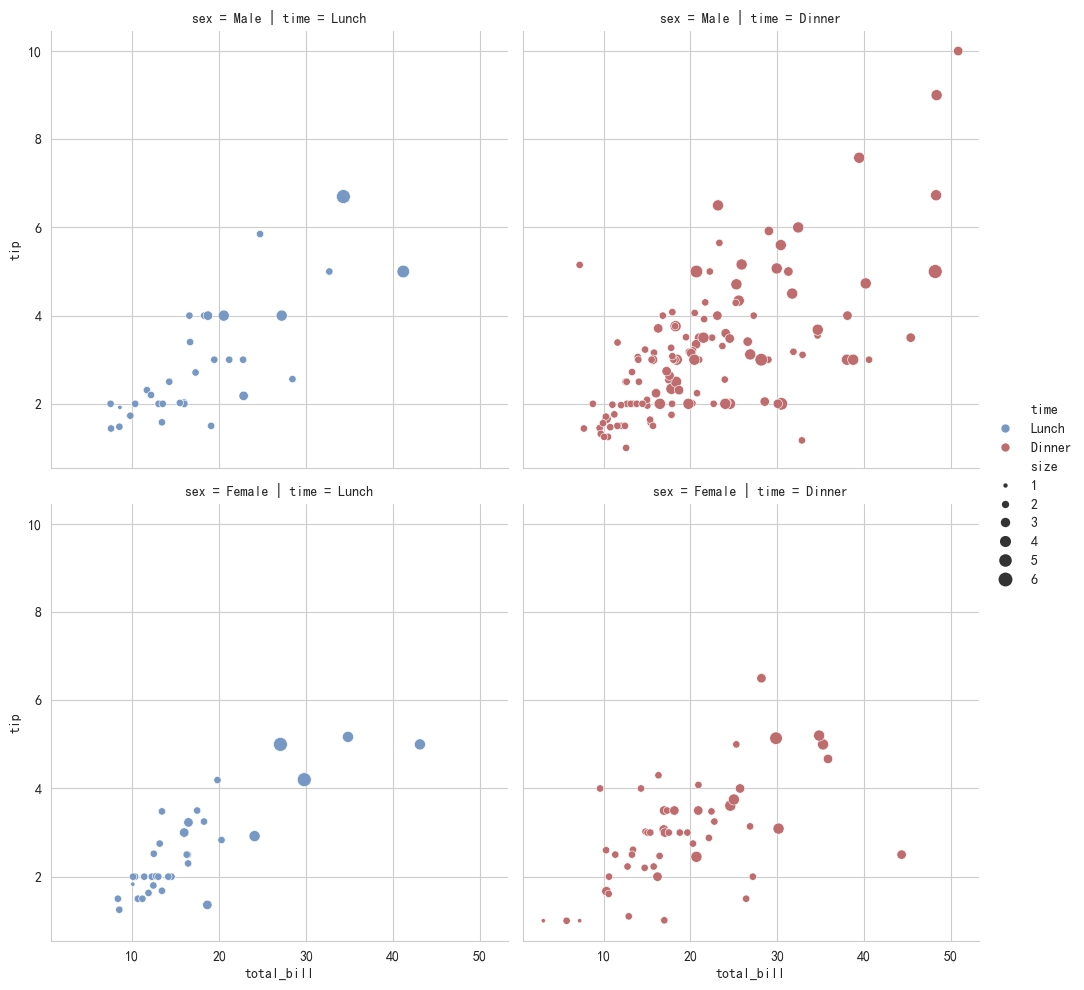

In [72]:
axs = sns.relplot(x="total_bill", y="tip", hue="time", size="size",
            palette=[color.blue1[1], color.red[1]], sizes=(10, 100),
                  col="time",row='sex', data=tips);


# 4. 分类散点图

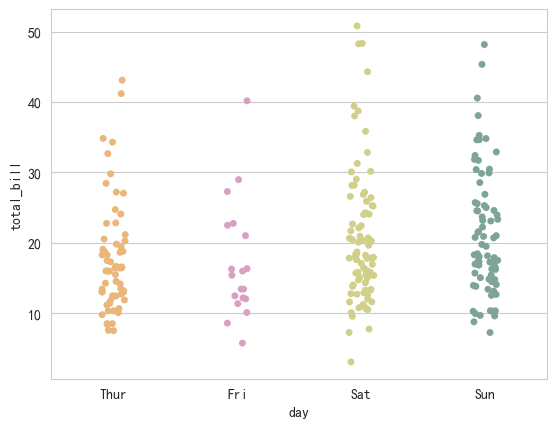

In [79]:
sns.stripplot(x="day", y="total_bill", data=tips, hue="day",
              palette=color.random_color(color.rainbow, 4));    # palette设置颜色盘

### 每个点都不会重叠

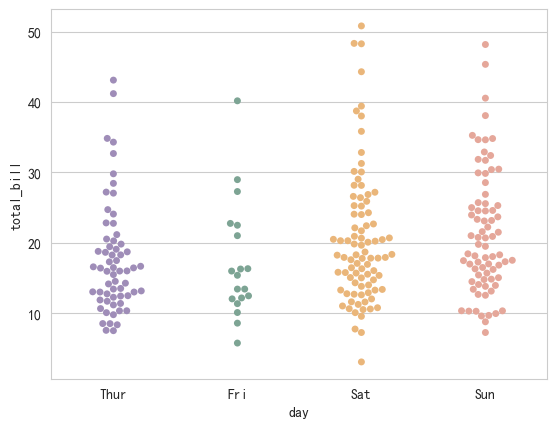

In [80]:
sns.swarmplot(x="day", y="total_bill", data=tips,
              hue="day", palette=color.random_color(color.rainbow, 4));

## 箱型图

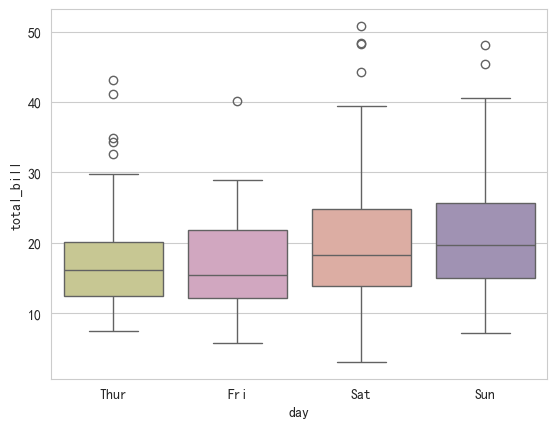

In [84]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="day",
            palette=color.random_color(color.rainbow, 4));

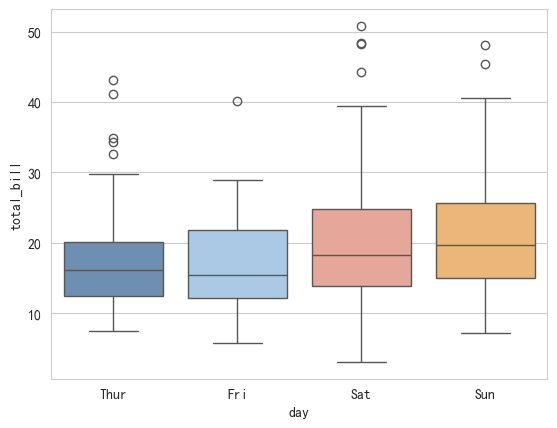

In [85]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="day", 
            palette=color.random_color(color.rainbow, 4),
            saturation=1);      # saturation饱和度为1

## 小提琴图

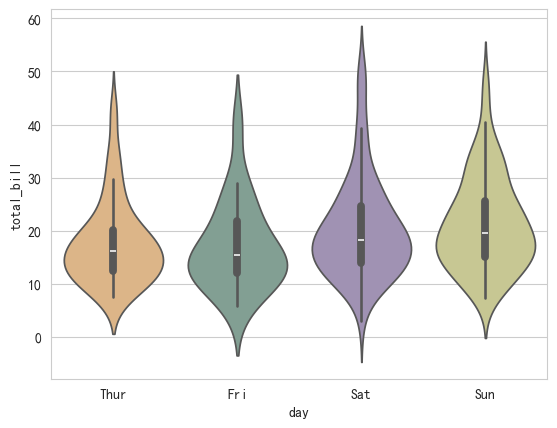

In [86]:
sns.violinplot(x="day", y="total_bill", data=tips ,hue="day", 
            palette=color.random_color(color.rainbow, 4));

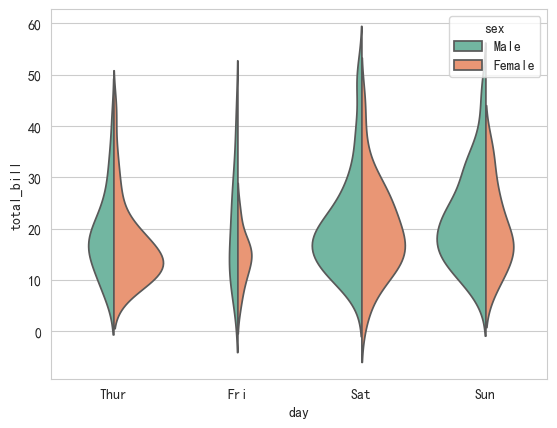

In [88]:
# 设置按性别分类，调色为“Set2”，分割，以计数的方式，不表示内部。
sns.violinplot(x="day", y="total_bill", hue="sex",data=tips,
               palette="Set2", split=True, density_norm="count", inner=None);

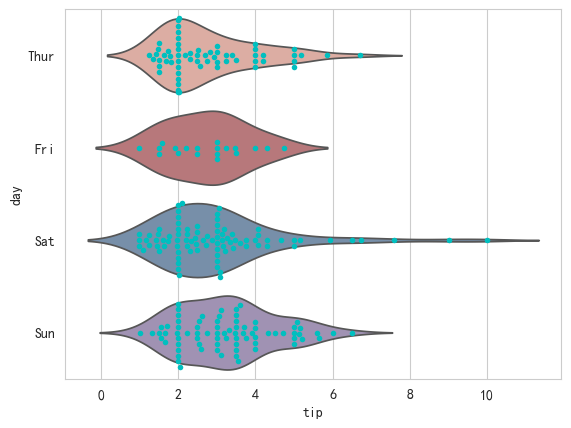

In [98]:
# 绘制小提琴图
sns.violinplot(x="tip", y="day", data=tips, inner=None, hue="day",
               palette=color.random_color(color.rainbow, 4))

# 绘制分布密度散点图
sns.swarmplot(x="tip", y="day", data=tips, color="c", size=4);

## 条形图

estimator：用于估计每个分类箱内的统计函数，默认为mean。当然你也可以设置estimator=np.median/np.std/np.var……
order：设置特征值的顺序，例如：order=[‘Sat’,‘Sun’]；
ci：允许的误差的范围（控制误差棒的百分比，在0-100之间）,若填写"sd",则用标准误差(默认为95)，也可设置ci=None；
capsize：设置误差棒帽条（上下两根横线）的宽度，float；
errcolor：表示置信区间的线条的颜色；
errwidth：float，设置误差条线(和帽)的厚度。

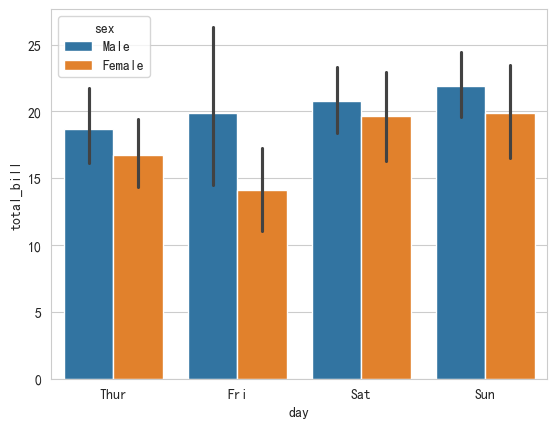

In [99]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips);

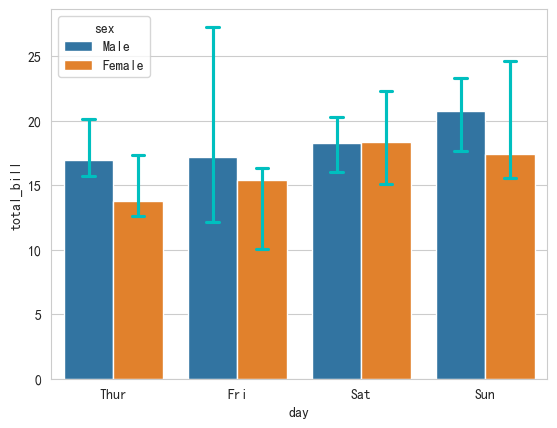

In [101]:
sns.barplot(x="day", y="total_bill",hue='sex', data=tips,
            estimator=np.median,capsize=0.2,err_kws={'color': 'c'});

## 计数图

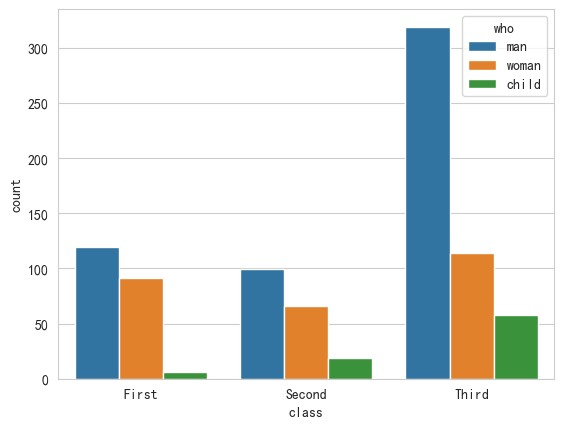

In [102]:
titanic = sns.load_dataset("titanic")
sns.countplot(x="class",hue="who", data=titanic);

## 总结分类图

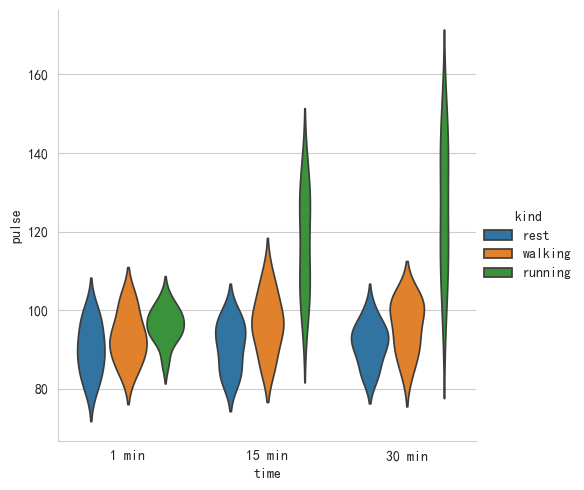

In [103]:
# 绘制一个小提琴图，按数据中的kind类别分组（数据中的），不要中心框线。
exercise = sns.load_dataset("exercise")
sns.catplot(x="time", y="pulse", hue="kind",data=exercise, kind="violin",inner=None);

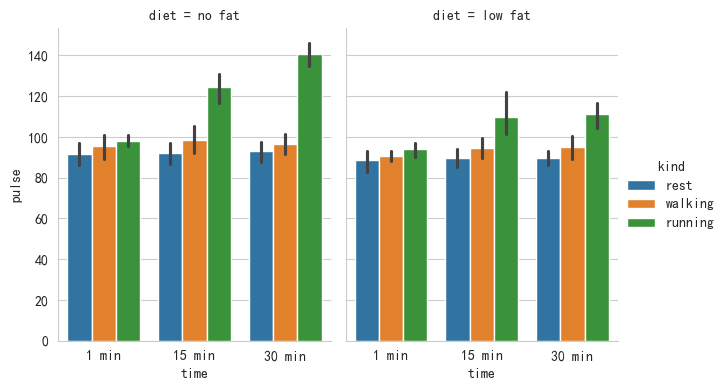

In [104]:
sns.catplot(x="time", y="pulse", hue="kind",kind='bar',col="diet",
            data=exercise,height=4, aspect=0.8);

# 5. 分布图

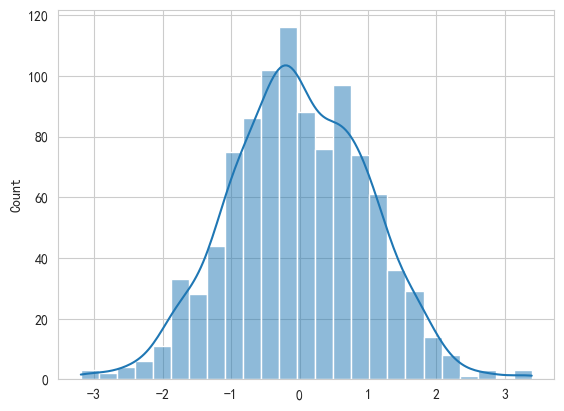

In [107]:
# 随机生成1000个符合正态分布的数
np.random.seed(666)
x = np.random.randn(1000)
sns.histplot(x, kde=True);  # kde：是否显示核密度估计曲线

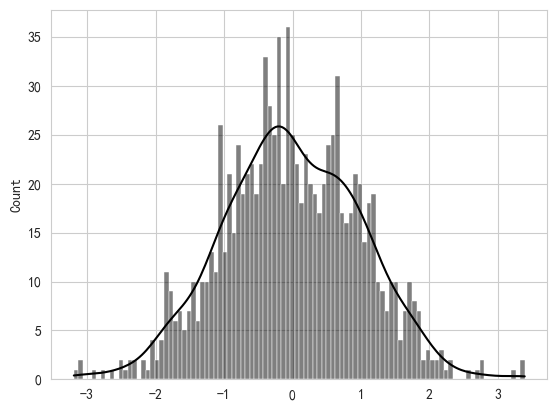

In [108]:
# 修改更多参数，设置方块的数量，颜色为‘k’
sns.histplot(x,kde=True,bins=100,color='k');

## kdeplot(核密度图)

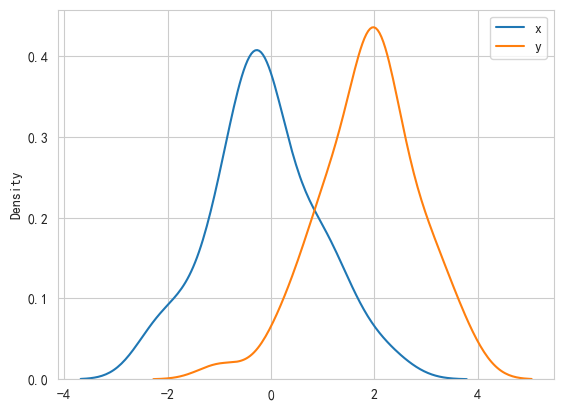

In [115]:
mean, cov = [0, 2], [(1, .5), (.5, 1)]
#这是一个多元正态分布，x和y都是长度为50的向量
x, y = np.random.multivariate_normal(mean, cov, size=50).T
sns.kdeplot(x, label="x")
sns.kdeplot(y, label="y")
plt.legend();

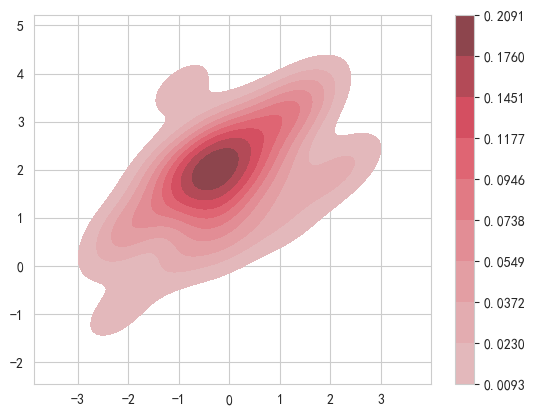

In [122]:
# 双变量核密度图
sns.kdeplot(x=x, y=y, fill=True, cbar=True, color=color.red[2]);

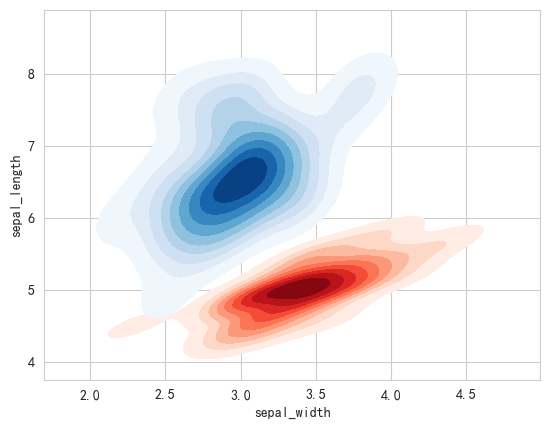

In [137]:
# 二色二元密度图，使用鸢尾花数据集
iris = sns.load_dataset("iris")
setosa = iris[iris.species == "setosa"]
virginica = iris[iris.species == "virginica"]
sns.kdeplot(x=setosa.sepal_width, y=setosa.sepal_length,cmap="Reds",
            fill=True, thresh=0.05)
sns.kdeplot(x=virginica.sepal_width, y=virginica.sepal_length,cmap="Blues",
            fill=True, thresh=0.05);
# thresh=0.05: 密度图中最低密度区域的显示阈值

## 联合分布图 (直方图和核密度图的组合)

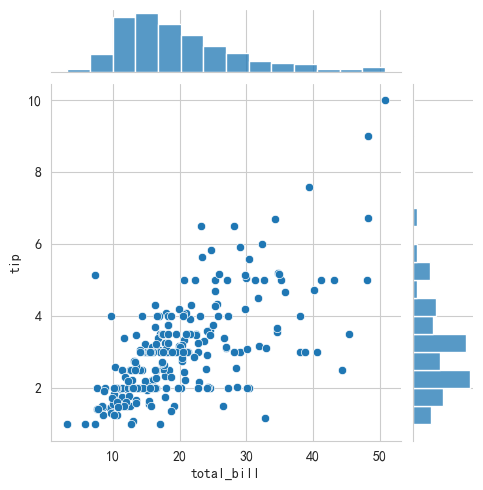

In [139]:
# 用边缘直方图绘制散点图
tips = sns.load_dataset("tips")
sns.jointplot(x="total_bill", y="tip", data=tips,height=5);     # height 图的尺度大小

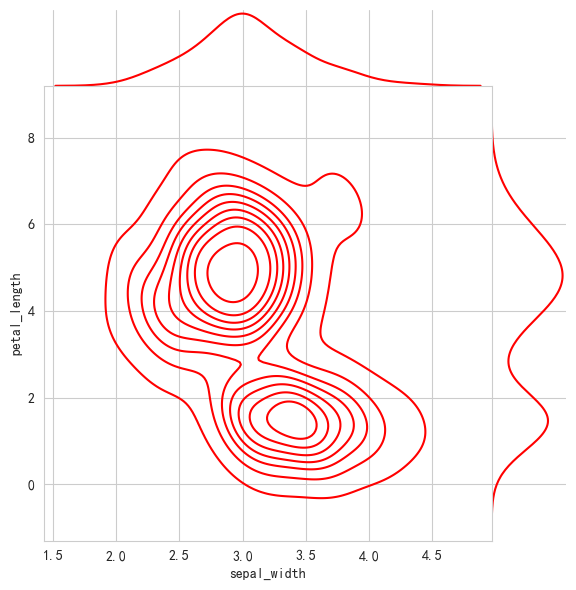

In [143]:
# 用密度估计替换散点图和直方图，调节间隔和比例：kind="kde"
iris = sns.load_dataset("iris")
sns.jointplot(x="sepal_width", y="petal_length", data=iris,kind="kde", 
              space=0,ratio=6 ,color="r");

## 变量关系组图

### 对角线图 描述该变量的直方图分布，非对角线图描述两个变量之间的联合分布

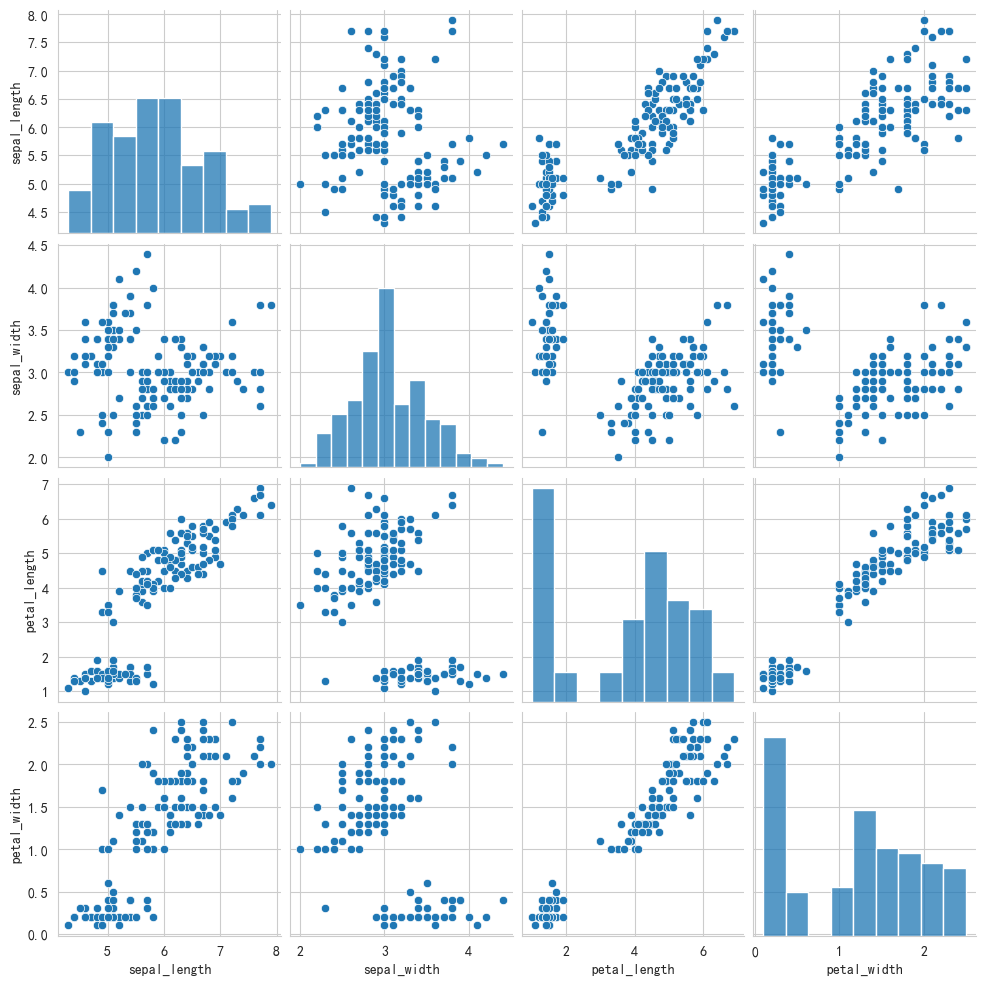

In [144]:
# 采用默认格式绘制鸢尾花数据集，这样对于分类问题来说并不能有效的观察数据情况。
iris = sns.load_dataset("iris")
sns.pairplot(iris);

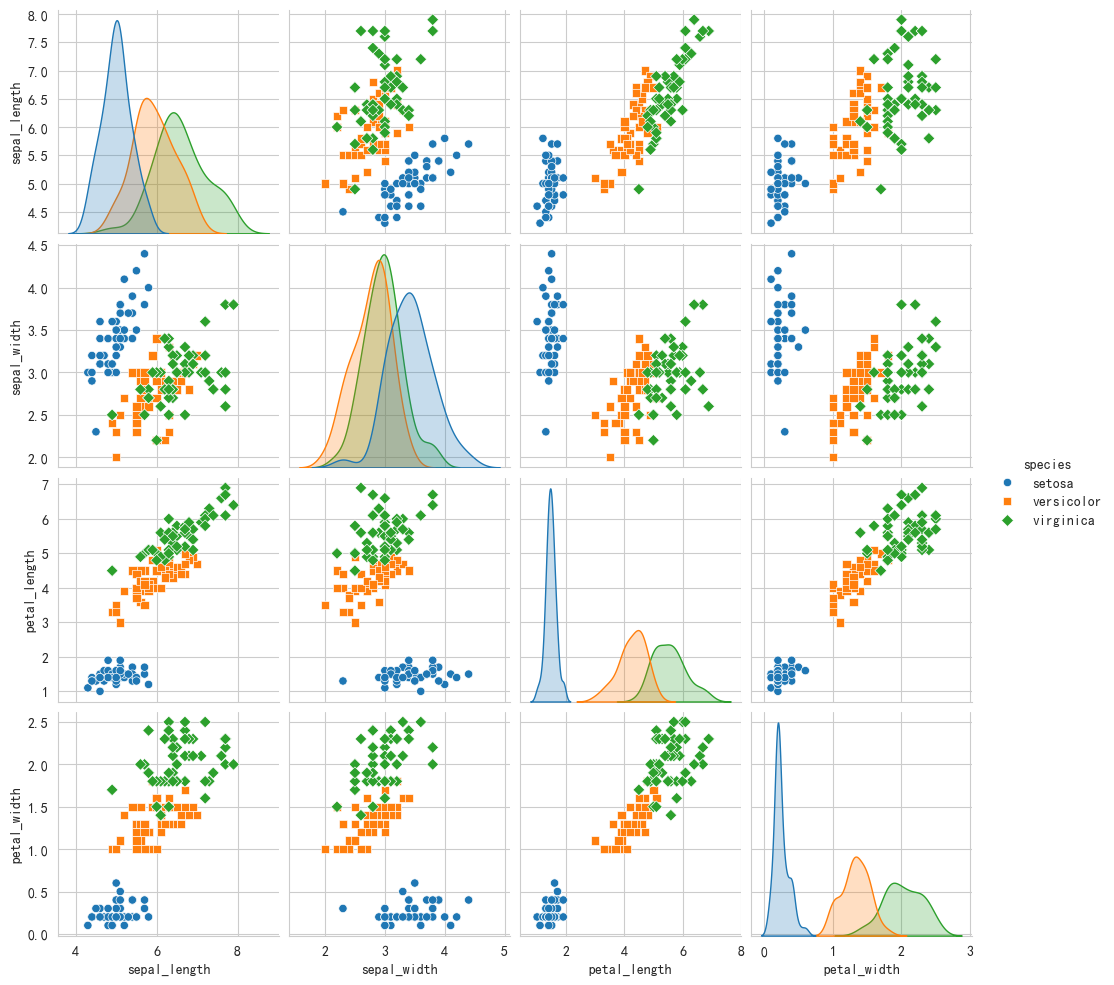

In [145]:
# 使用hue="species"对不同种类区分颜色绘制，并使用不同标记：
sns.pairplot(iris, hue="species", markers=["o", "s", "D"]);

# 6. 回归图

#### order：多项式回归，控制进行回归的幂次，设定指数，可以用多项式拟合；
#### logistic：逻辑回归；
#### x_jitter，y_jitter：给x，y轴随机增加噪音点，设置这两个参数不影响最后的回归直线；

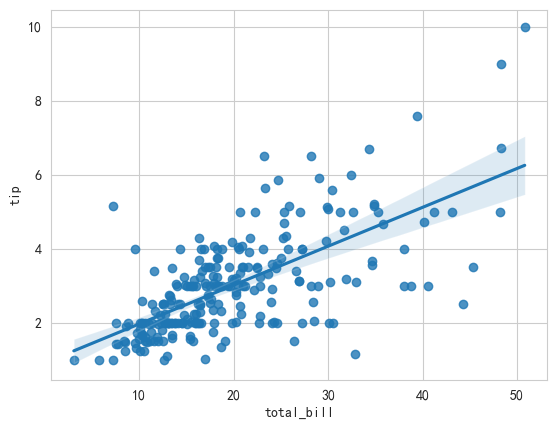

In [146]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip",data=tips, order=1);     # 一次回归

## 网格+回归图

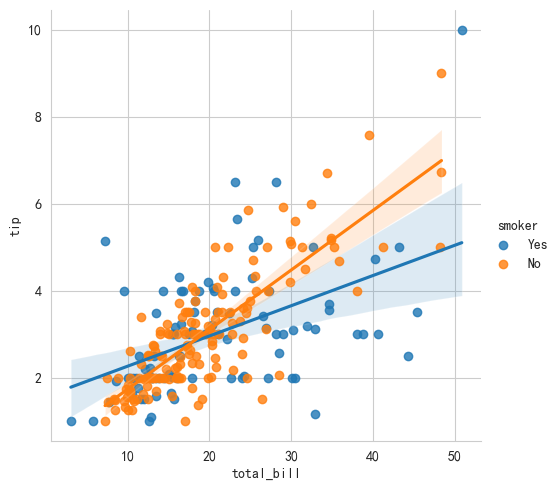

In [150]:
# 绘制一个第三个变量的条件，并绘制不同颜色的回归图
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

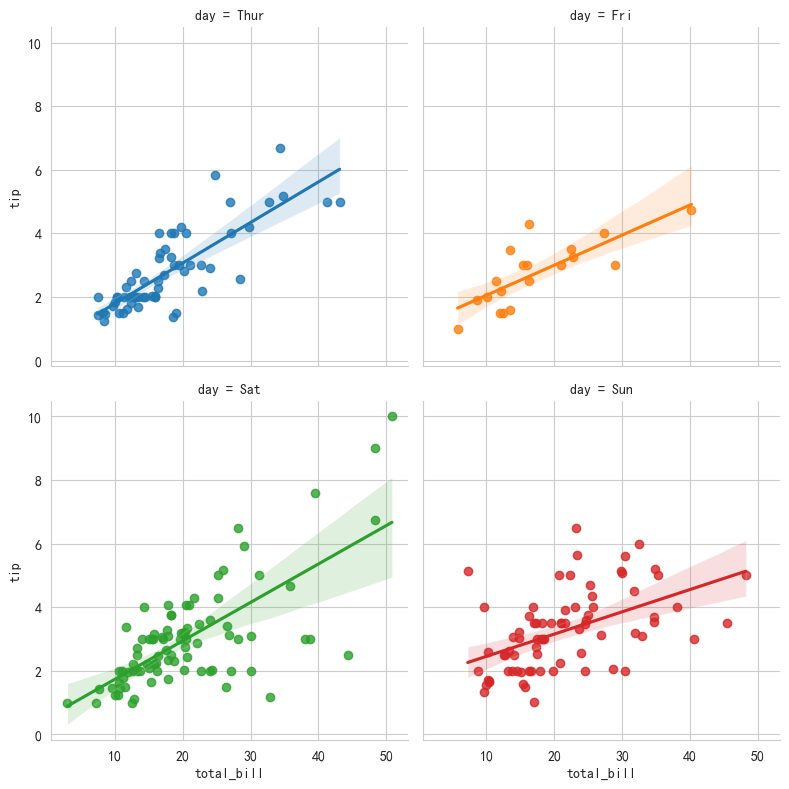

In [151]:
# 将变量分为多行，并改变大小：
sns.lmplot(x="total_bill", y="tip", col="day", hue="day", data=tips,
           col_wrap=2, height=4);

# 7. 矩阵图

## 热力图

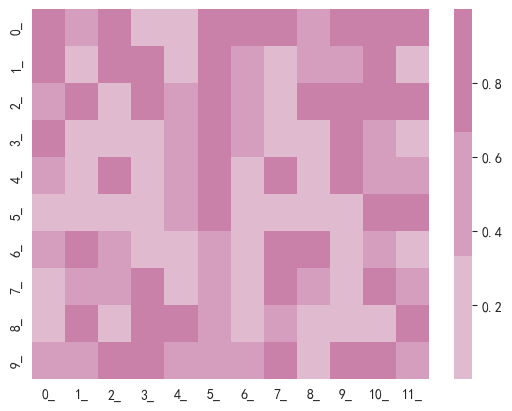

In [165]:
# 绘制一个简单的numpy数组的热力图：
x = np.random.rand(10, 12)
labels = [str(i) + "_" for i in range(12)]
ax = sns.heatmap(x)     # cmap=color.red设置颜色
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[0: 10]);

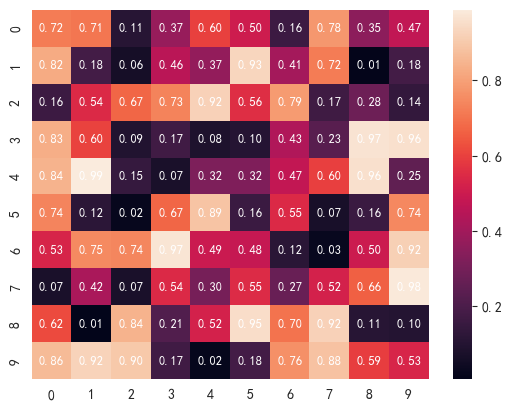

In [166]:
# 显示数字和保留几位小数，并修改数字大小字体颜色格式：
x= np.random.rand(10, 10)
sns.heatmap(x,annot=True,annot_kws={'size':9,'weight':'bold', 'color':'w'},fmt='.2f');

## 聚类图

热力图的颜色：每个方块的颜色表示对应的数值大小。你可以根据颜色渐变来判断某些特征之间是否存在模式。
树状图：
行树状图展示了不同样本的聚类情况。相似的样本会被归为同一个分支，分支越早合并，表示样本之间的相似性越高。
列树状图展示了不同特征的聚类情况。相似的特征会被归为同一个分支，显示它们在样本中的表现是相似的。
聚类后的数据重排：通过重新排列行和列，clustermap 将相似的样本和特征放在一起，使得数据中的模式更加明显。如果某些行和列形成了一个紧密的块，这意味着它们在数值上有相似的表现。

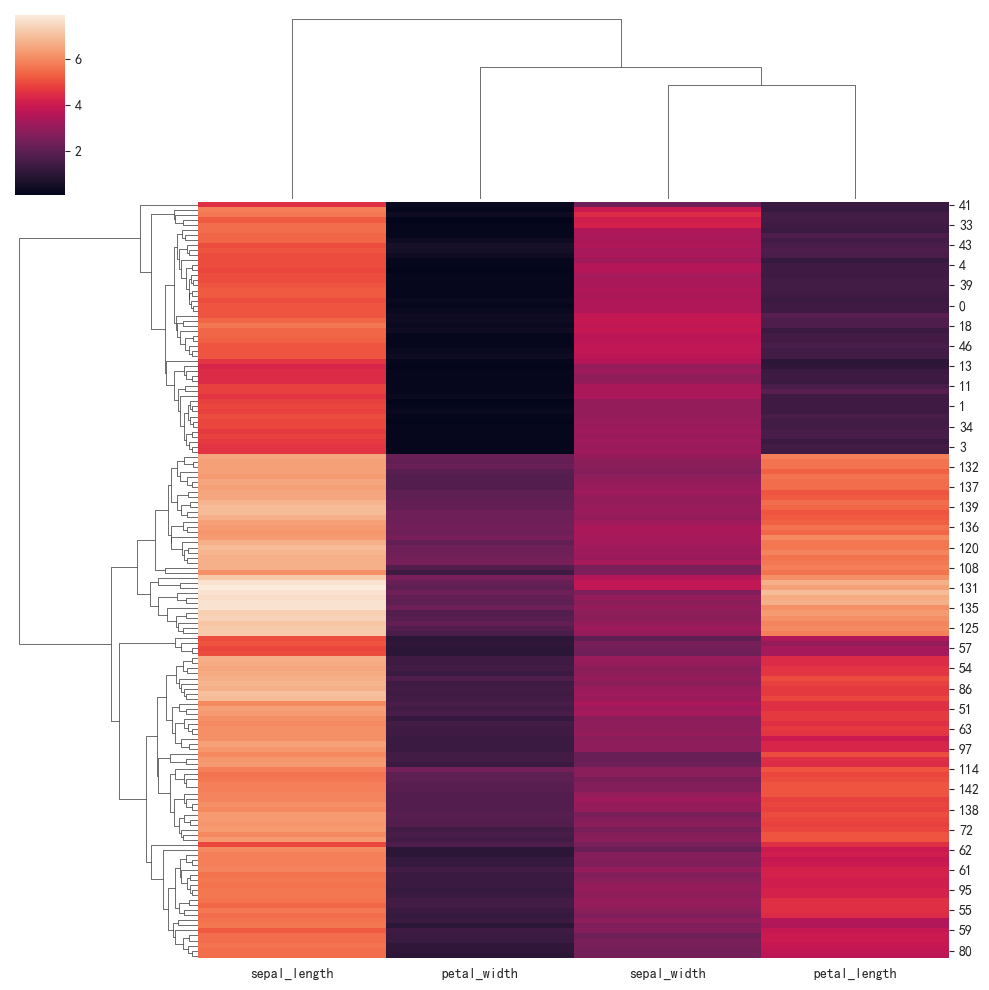

In [167]:
species = iris.pop("species")
sns.clustermap(iris);

# 8. 网格

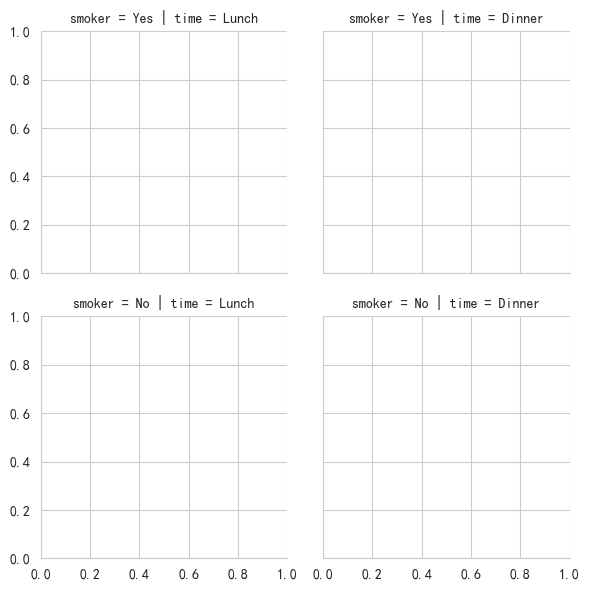

In [168]:
# 使用TIPS数据集初始化2x2个面网格:
sns.FacetGrid(tips, col="time", row="smoker"); # 2*2

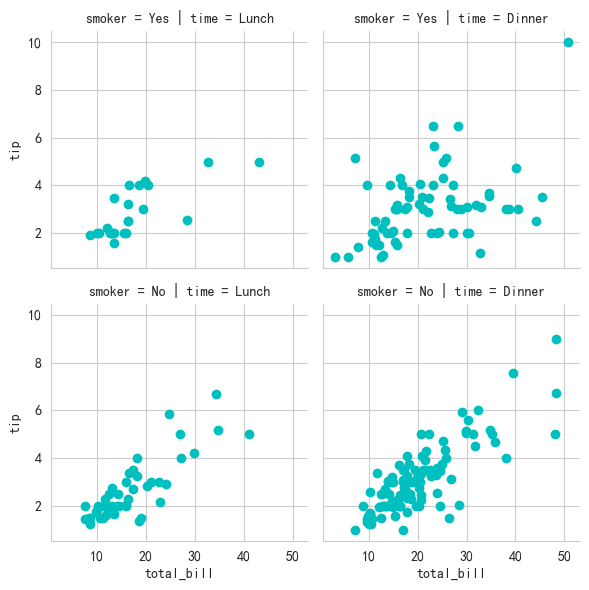

In [178]:
# 然后，在每个格子上绘制一个散点图，根据列和行进行分类，描述两个变量的联合分布：
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", color="c"); # g.map()需要传入一个绘图函数

## PairGrid

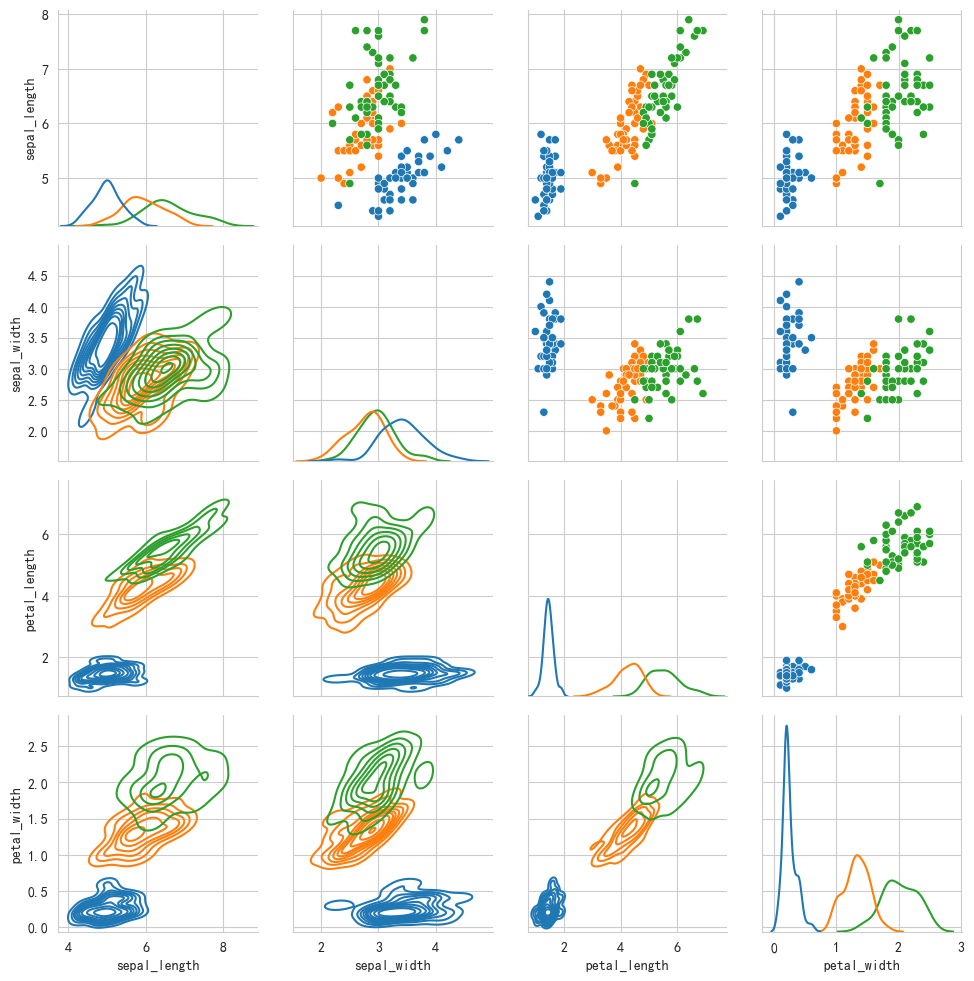

In [179]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris,hue="species")
g.map_upper(sns.scatterplot)    #在上对角线子图上用二元函数绘制的图
g.map_lower(sns.kdeplot)    #在下对角线子图上用二元函数绘制的图
g.map_diag(sns.kdeplot) #对角线单变量子图
plt.show()